In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)

2.3.0


1. Load the data file using pandas. 

In [3]:
df = pd.read_csv(r'C:\Users\hp\Desktop\App Rating Prediction\googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


2. Check for null values in the data. Get the number of null values for each column.

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

In [7]:
df.columns = df.columns.str.replace(' ','_').str.strip()

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

5. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
   - Extract the numeric value from the column
   - Multiply the value by 1,000, if size is mentioned in Mb

In [9]:
def convert(Size):
    if 'M' in Size:
        x = Size[:-1]
        x = float(x)*1000
        return x,
    elif 'K' in Size:
        x = Size[:-1]
        x = float(x)
        return x
        
df['Size'] = df['Size'].map(convert)

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [10]:
df['Reviews'] = df['Reviews'].astype(float)

Installs field is currently stored as string and has values like 1,000,000+. 
- Treat 1,000,000+ as 1,000,000
- remove ‘+’, ‘,’ from the field, convert it to integer

In [11]:
df['Installs'] = df['Installs'].str.replace('+','', regex= False).str.replace(',',"",regex = False)

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [12]:
df['Price'] = df['Price'].str.replace('$',"",regex= False).astype('float')

5. Sanity checks:

- Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [13]:
df.drop(df[~df['Rating'].between(1,5)].index, inplace = True)

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.



In [14]:
df['Installs'] = df['Installs'].astype('float')
df.drop(df[df['Reviews'] > df['Installs']].index, inplace = True)

In [15]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [16]:
df_free_apps = df.drop(df[(df['Type'] != "Free") & (df['Price'] > 0)].index)

In [17]:
df_free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"(19000.0,)",10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"(14000.0,)",500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"(8700.0,)",5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"(25000.0,)",50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"(2800.0,)",100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

In [18]:
df['Price'] = df['Price'].astype(str).str.replace('$','', regex = False)
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [19]:
# Find out outliers by using IQR methoed.
Q1  = df['Price'].quantile(.25)
Q3 =  df['Price'].quantile(.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound  = Q3 + 1.5*IQR
outliers = df[(df['Price'] < Lower_bound) | (df['Price'] > Upper_bound)]
print(outliers[['App','Price']])

                                                 App  Price
234    TurboScan: scan documents and receipts in PDF   4.99
235                   Tiny Scanner Pro: PDF Doc Scan   4.99
290    TurboScan: scan documents and receipts in PDF   4.99
291                   Tiny Scanner Pro: PDF Doc Scan   4.99
427                               Puffin Browser Pro   3.99
...                                              ...    ...
10682                            Fruit Ninja Classic   0.99
10690                                       FO Bixby   0.99
10760                                Fast Tract Diet   7.99
10782                        Trine 2: Complete Story  16.99
10785                                   sugar, sugar   1.20

[642 rows x 2 columns]


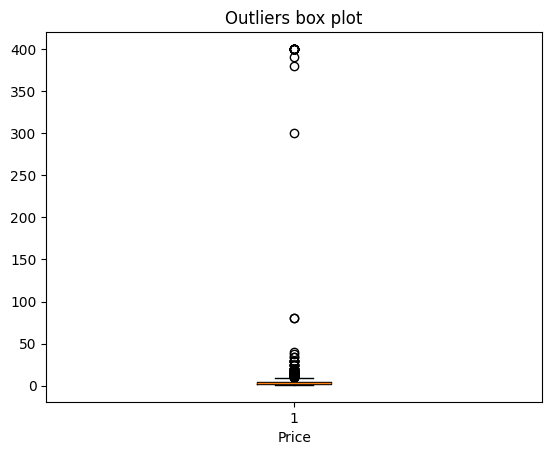

In [20]:
plt.boxplot(outliers['Price'])
plt.title('Outliers box plot')
plt.xlabel('Price')
plt.show()

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

In [21]:
df[['App','Reviews']].sort_values( 'Reviews', ascending = False)

,App,Reviews
2544,Facebook,78158306.0
3943,Facebook,78128208.0
336,WhatsApp Messenger,69119316.0
381,WhatsApp Messenger,69119316.0
3904,WhatsApp Messenger,69109672.0
...,...,...
8955,DV ASSIST,1.0
6363,Read it easy for BK,1.0
10529,FK CLASSIC FOR YOU,1.0
4477,Android P Style Icon Pack,1.0


In [22]:
high_no_reveiews_apps = df.groupby('App')['Reviews'].sum().sort_index().head(10)

In [23]:
high_no_reveiews_apps

App
+Download 4 Instagram Twitter                     40467.0
- Free Comics - Comic Apps                          115.0
.R                                                  259.0
/u/app                                              573.0
058.ba                                               27.0
1. FC Köln App                                     2019.0
10 Best Foods for You                              4980.0
10 Minutes a Day Times Tables                       681.0
10 WPM Amateur ham radio CW Morse code trainer       10.0
10,000 Quotes DB (Premium)                           70.0
Name: Reviews, dtype: float64

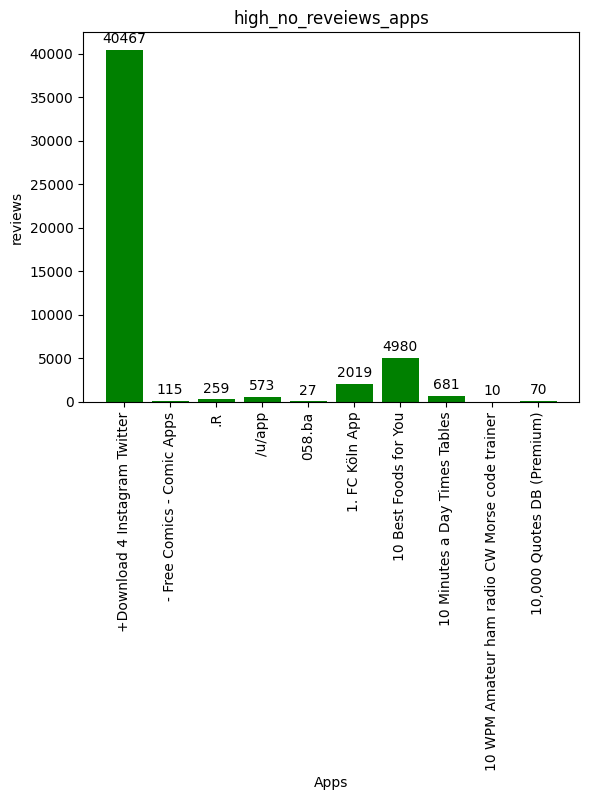

In [24]:
bars = plt.bar(high_no_reveiews_apps.index, high_no_reveiews_apps.values, color = 'green')
plt.title('high_no_reveiews_apps')
plt.xlabel('Apps')
plt.ylabel('reviews')
plt.bar_label(bars, padding = 3)
plt.xticks(rotation = 90)
plt.show()

Histogram for Rating
- How are the ratings distributed? Is it more toward higher ratings?

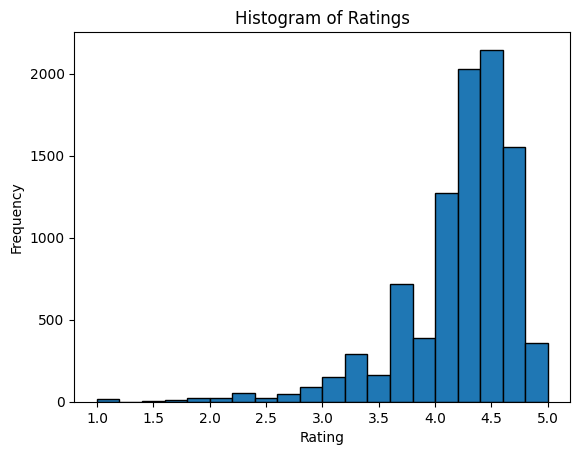

In [25]:
plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

In [26]:
df['Size'].isnull().sum()

np.int64(1893)

In [27]:
df['Size'].head()

0    (19000.0,)
1    (14000.0,)
2     (8700.0,)
3    (25000.0,)
4     (2800.0,)
Name: Size, dtype: object

In [28]:

print(type(df['Size'].iloc[0]))
print(df['Size'].iloc[0])

<class 'tuple'>
(19000.0,)


In [29]:
df['Size'] = df['Size'].apply(lambda x:x[0] if isinstance(x,tuple) else x)
df['Size'] = df['Size'].astype(float) 

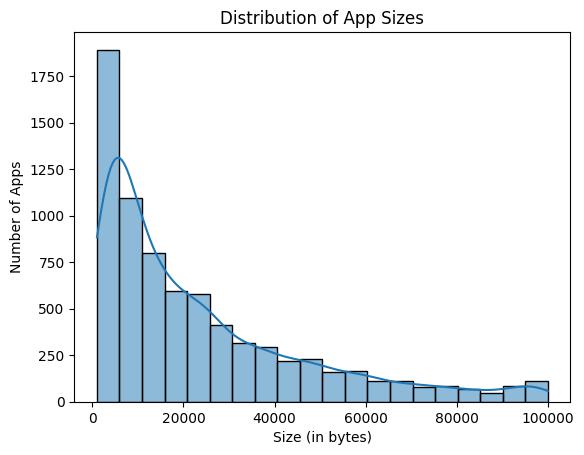

In [30]:
sns.histplot(x='Size', bins=20, kde=True, edgecolor='black', data=df)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (in bytes)')
plt.ylabel('Number of Apps')
plt.show()


6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?



In [31]:
df[df['Price'] >=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,NaN,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Drop these as most seem to be junk apps

In [32]:
df = df.drop(df[df['Price'] >=200].index, axis = 0).reset_index(drop= True)

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.



In [34]:
df = df.drop(df[df['Reviews'] >= 2000000].index, axis = 0).reset_index(drop= True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
- Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [35]:
percentile = df['Installs'].quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])
percentile

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

Decide a threshold as cutoff for outlier and drop records having values more than that

In [36]:
thresold = df['Installs'].quantile(0.95)
df = df[df['Installs'] <= thresold].reset_index(drop = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
- Make scatter plot/joinplot for Rating vs. Price
- What pattern do you observe? Does rating increase with price?

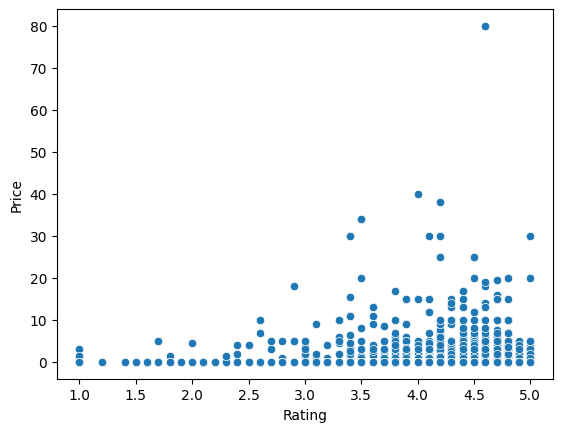

In [37]:
sns.scatterplot(data = df, x = 'Rating', y = 'Price' )
plt.show()

#Rating is increasing with price

Make scatter plot/joinplot for Rating vs. Size
- Are heavier apps rated better?



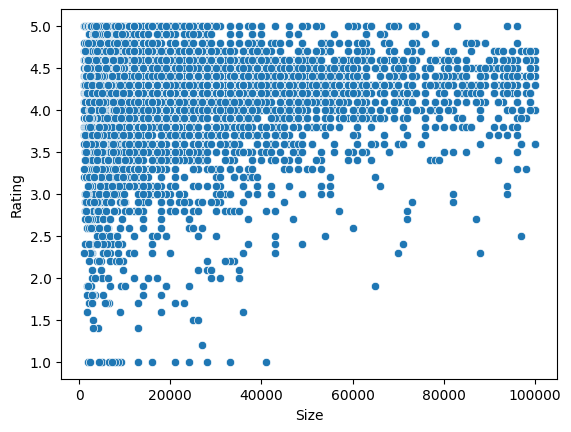

In [38]:
sns.scatterplot(data = df, y = 'Rating', x = 'Size')
plt.show()

#Rating is decreasing as per the Size is increasing

Make scatter plot/joinplot for Rating vs. Reviews
- Does more review mean a better rating always?

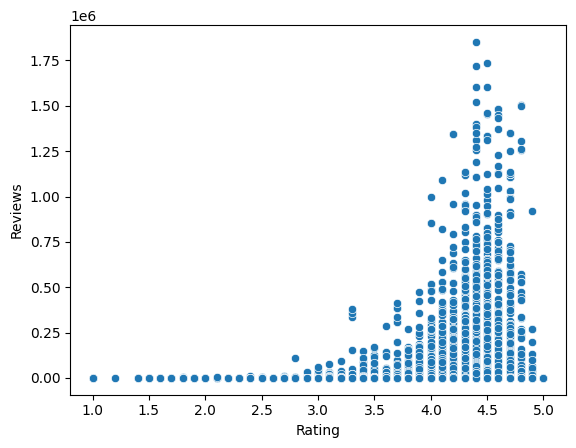

In [39]:
sns.scatterplot(data= df, x = 'Rating', y = 'Reviews')
plt.show()

#More reviews does'nt more rating always.

Make boxplot for Rating vs. Content Rating
- Is there any difference in the ratings? Are some types liked better?

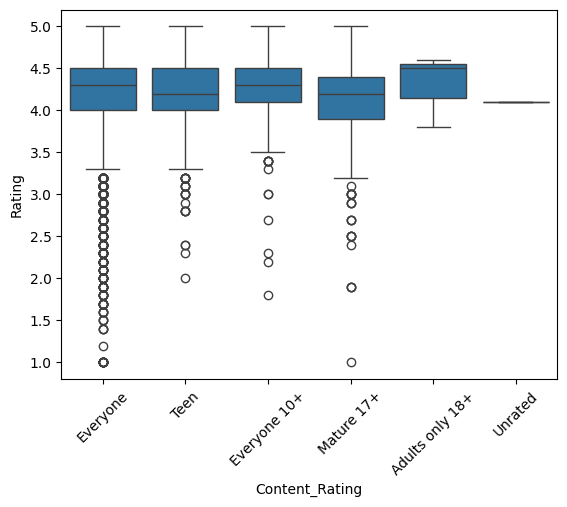

In [41]:
sns.boxplot( y = 'Rating', x = 'Content_Rating', data =df)
plt.xticks(rotation = 45)
plt.show()

- Teen" and "Everyone 10+" apps tend to be more consistently well-rated.
- "Adults only 18+" shows the highest and most consistent ratings (though based on fewer apps).
- "Mature 17+" and "Everyone" have more variability, with several low-rated apps.

Make boxplot for Ratings vs. Category
- Which genre has the best ratings?

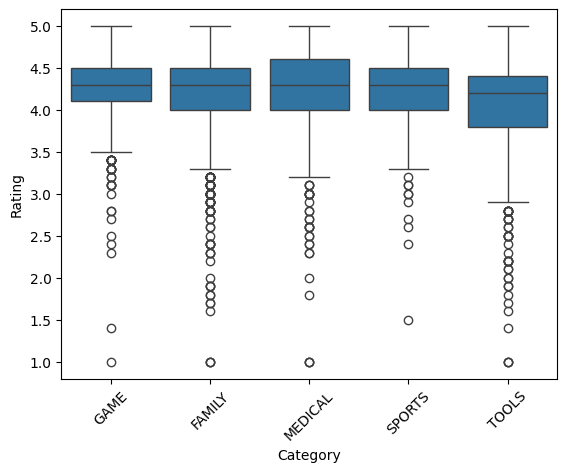

In [48]:
top_5_category_rating = df.groupby('Category')['Rating'].sum().sort_values(ascending= False).head(5)
category_df = top_5_category_rating.index.tolist()
top_df = df[df['Category'].isin(category_df)]

sns.boxplot(data = top_df, y = 'Rating', x = 'Category')
plt.xticks(rotation = 45)
plt.show()

#Medical has highest Rating

8. Data preprocessing
- For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
- Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [82]:
inp1 = df.copy()

In [83]:
inp1['Review_log'] = np.log1p(inp1['Reviews'])
inp1['Install_log'] = np.log1p(inp1['Installs'])

In [84]:
inp1['Review_log'].head()

0     5.075174
1     6.875232
2    11.379520
3     6.875232
4     5.123964
Name: Review_log, dtype: float64

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [85]:
inp1 = inp1.drop(['App','Last_Updated','Current_Ver','Android_Ver'], axis = 1)

In [86]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Review_log', 'Install_log'],
      dtype='object')

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [87]:
# Create dummy variables using pd.get_dummies
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content_Rating'], drop_first=True)


In [88]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
df_train, df_test = train_test_split(inp2, test_size=0.30, random_state=42)

Separate the dataframes into X_train, y_train, X_test, and y_test.

In [100]:
# Separate X and y for training set
X_train = df_train
y_train = df_train.pop('Rating')

# Separate X and y for test set
X_test = df_test
y_test = df_test.pop('Rating')


12. Model building

Use linear regression as the technique

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Drop non-numeric columns from inp2 if any still exist
inp2_numeric = inp2.select_dtypes(include=['int64', 'float64'])

# Step 2: Define X and y
X = inp2_numeric.drop(columns=['Rating'])
y = inp2_numeric['Rating']

# Step 3: Train-test split (70-30)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Impute missing values in numeric features with mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Step 5: Build and train linear regression model
lr = LinearRegression()
lr.fit(x_train_imputed, y_train)

# Step 6: Predict and calculate R² score on training set
y_train_pred = lr.predict(x_train_imputed)
r2_train = r2_score(y_train, y_train_pred)

print("R² score on the training set:", r2_train)


R² score on the training set: 0.11852796835999091


12. Make predictions on test set and report R2.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Load your dataset — assuming it's already loaded as `inp2`
# inp2 = pd.read_csv('your_file.csv')  # if needed

# Step 2: Define features (X) and target (y)
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Separate columns by data type
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Step 5: Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 6: Combine preprocessing with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 7: Fit model on training data
pipeline.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Step 9: Print R² scores
print("R² score on train set:", r2_score(y_train, y_train_pred))
print("R² score on test set:", r2_score(y_test, y_test_pred))


R² score on train set: 0.11430021965774217
R² score on test set: 0.09702224509265145
